In [78]:
import pandas as pd
import tensorflow as tf
import numpy as np
import scipy.io
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from keras.layers.core import Dense, Activation
import pandas

In [287]:
data_info = pandas.read_csv("NUSW-NB15_features.csv", encoding = "ISO-8859-1", header=None).values
features = data_info[:]
feature_names = features[:, 1]  # Names of the features in a list

 

In [288]:
dataframe1 = pandas.read_csv("UNSW- NB15_1.csv"       , names = feature_names, encoding = "ISO-8859-1", header=None)
dataframe2 = pandas.read_csv("UNSW- NB15_2.csv", names = feature_names, encoding = "ISO-8859-1",header=None)
dataframe3 = pandas.read_csv("UNSW- NB15_3.csv", names = feature_names,   encoding = "ISO-8859-1",header=None)
dataframe4 = pandas.read_csv("UNSW- NB15_4.csv",  names = feature_names,  encoding = "ISO-8859-1",header=None)

In [290]:
#concat datasets

dataframe = pandas.concat([dataframe1, dataframe2,dataframe3,dataframe4])

del dataframe1
del dataframe2
del dataframe3
del dataframe4

df = dataframe

In [292]:
#cleaning data

df['attack_cat'] = df['attack_cat'].replace(np.nan, 'Normal', regex=True)
df.fillna(0, inplace=True)

df[0:5]

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.9,7045,149.171.126.7,25,tcp,FIN,0.201886,37552,3380,31,...,,2,2,7,4,1,1,3,Normal,0
1,59.166.0.9,9685,149.171.126.2,80,tcp,FIN,5.864748,19410,1087890,31,...,,3,1,4,4,1,1,1,Normal,0
2,59.166.0.2,1421,149.171.126.4,53,udp,CON,0.001391,146,178,31,...,,3,5,2,7,1,1,4,Normal,0
3,59.166.0.2,21553,149.171.126.2,25,tcp,FIN,0.053948,37812,3380,31,...,,1,1,4,7,1,1,3,Normal,0
4,59.166.0.8,45212,149.171.126.4,53,udp,CON,0.000953,146,178,31,...,,2,5,2,1,1,1,2,Normal,0


In [293]:
# seperate features and outcomes

x = df.drop(['attack_cat','Label'], axis = 1)
y = df[['attack_cat']]

x[0:5]


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,59.166.0.9,7045,149.171.126.7,25,tcp,FIN,0.201886,37552,3380,31,...,0.0,0.0,,2,2,7,4,1,1,3
1,59.166.0.9,9685,149.171.126.2,80,tcp,FIN,5.864748,19410,1087890,31,...,1.0,0.0,,3,1,4,4,1,1,1
2,59.166.0.2,1421,149.171.126.4,53,udp,CON,0.001391,146,178,31,...,0.0,0.0,,3,5,2,7,1,1,4
3,59.166.0.2,21553,149.171.126.2,25,tcp,FIN,0.053948,37812,3380,31,...,0.0,0.0,,1,1,4,7,1,1,3
4,59.166.0.8,45212,149.171.126.4,53,udp,CON,0.000953,146,178,31,...,0.0,0.0,,2,5,2,1,1,1,2


In [294]:
#taking care of infinite values, converting them to NaN and replacing with zero

x['sport'] = pd.to_numeric(x['sport'], errors='coerce')
x['dsport'] = pd.to_numeric(x['dsport'], errors='coerce')
x['ct_ftp_cmd'] = pd.to_numeric(x['ct_ftp_cmd'], errors='coerce')

x['sport'] = x['sport'].replace(np.nan, 0)
x.replace(np.nan, 0, inplace=True)

x['dsport'] = x['dsport'].replace(np.nan, 0)
x.replace(np.nan, 0, inplace=True)

x['ct_ftp_cmd'] = x['ct_ftp_cmd'].replace(np.nan, 0)
x.replace(np.nan, 0, inplace=True)

In [295]:
#turn categorical data into float variables 

from sklearn.preprocessing import LabelEncoder

le = preprocessing.LabelEncoder()
le.fit(x[['proto']])

x.proto = le.transform(x[['proto']])

##
le = preprocessing.LabelEncoder()
le.fit(x[['state']])

x.state = le.transform(x[['state']])

##
le = preprocessing.LabelEncoder()
le.fit(x[['service']])

x.service = le.transform(x[['service']])
##
le = preprocessing.LabelEncoder()
le.fit(x[['srcip']])

x.srcip = le.transform(x[['srcip']])
##
le = preprocessing.LabelEncoder()
le.fit(x[['dstip']])

x.dstip = le.transform(x[['dstip']])
##
le = preprocessing.LabelEncoder()
le.fit(x[['ct_ftp_cmd']])

x.ct_ftp_cmd = le.transform(x['ct_ftp_cmd'])
##
from sklearn.preprocessing import LabelEncoder

le = preprocessing.LabelEncoder()
le.fit(x[['sport']])

x.sport = le.transform(x['sport'])
##
le = preprocessing.LabelEncoder()
le.fit(x[['dsport']])

x.ct_ftp_cmd = le.transform(x['dsport'])

In [296]:
###scale data between 0 and 1 
## with 1 = standard deviation and mean = 0 

# Get column names first
names = x.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
scaled_df = scaler.fit_transform(x)
new_scaled_df = pd.DataFrame(scaled_df, columns=names)

x = pd.DataFrame(new_scaled_df)

x

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,1.192550,-1.047283,0.698196,-0.523187,-0.203660,0.116704,-0.102587,0.517035,-0.170844,-0.582074,...,-0.248325,-0.120455,-0.515321,-0.752966,-0.737894,-0.146957,-0.508461,-0.600199,-0.605138,-0.566256
1,1.192550,-0.922933,-0.007878,-0.519949,-0.203660,0.116704,1.430208,0.239075,7.695587,-0.582074,...,2.675309,-0.120455,-0.514767,-0.673820,-0.816729,-0.462722,-0.508461,-0.600199,-0.605138,-0.718822
2,0.346287,-1.313105,0.274552,-0.521539,0.416524,-2.027992,-0.156856,-0.056075,-0.194069,-0.582074,...,-0.248325,-0.120455,-0.515004,-0.673820,-0.501387,-0.673232,-0.190145,-0.600199,-0.605138,-0.489973
3,0.346287,-0.362354,-0.007878,-0.523187,-0.203660,0.116704,-0.142630,0.521018,-0.170844,-0.582074,...,-0.248325,-0.120455,-0.515321,-0.832112,-0.816729,-0.462722,-0.190145,-0.600199,-0.605138,-0.566256
4,1.071655,0.753401,0.274552,-0.521539,0.416524,-2.027992,-0.156974,-0.056075,-0.194069,-0.582074,...,-0.248325,-0.120455,-0.515004,-0.752966,-0.501387,-0.673232,-0.826778,-0.600199,-0.605138,-0.642539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440039,0.708971,0.181630,0.698196,2.031882,-0.203660,0.116704,-0.133601,-0.053409,-0.182101,-0.582074,...,-0.248325,-0.120455,2.034306,-0.832112,-0.737894,-0.567977,-0.614567,-0.600199,-0.605138,-0.566256
440040,0.950761,-0.395785,0.274552,-0.523422,-0.203660,-2.027992,-0.058420,-0.051325,-0.192851,-0.582074,...,-0.248325,15.547757,-0.515558,-0.752966,-0.737894,-0.673232,-0.720672,-0.500614,-0.468118,-0.642539
440041,0.467182,-0.364363,0.980626,-0.523422,-0.203660,-2.027992,1.557535,-0.030703,-0.180215,-0.582074,...,-0.248325,15.547757,-0.515558,-0.752966,-0.737894,-0.462722,-0.720672,-0.500614,-0.468118,-0.642539
440042,1.192550,0.292253,-1.702455,-0.519949,-0.203660,-2.027992,0.438505,-0.004718,1.009103,-0.582074,...,5.598942,-0.120455,-0.514767,-0.832112,-0.816729,-0.673232,-0.508461,-0.500614,-0.468118,-0.642539


In [297]:
#group attacks into Normal, DoS and OtherAttacks

labeldf=y['attack_cat']

newlabeldf=labeldf.replace({'Analysis' : 2, 'Backdoor' : 2 ,'DoS': 1, 'Exploits': 2, 'Fuzzers': 2, 'Normal': 0, 'Reconnaissance': 2,'Generic': 2 ,
                           'Shellcode' : 2,'Worms' : 2})

y['attack_cat'] = newlabeldf
print(y['attack_cat'].head())

0    0
1    0
2    0
3    0
4    0
Name: attack_cat, dtype: int64


In [298]:
label_df=y['attack_cat']
newlabel_df=label_df.replace({ 0 : 'Normal', 1 : 'DoS' , 2 : 'OtherAttacks'})

y['attack_cat'] = newlabel_df
print(y['attack_cat'].head())

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name: attack_cat, dtype: object


In [299]:
#feature slection 

from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore');
selector=SelectPercentile(f_classif, percentile=10)
X_new = selector.fit_transform(x,y)
X_new.shape

(440044, 5)

In [300]:
#number of features chosen 

colNames=list(x)

true=selector.get_support()
newcolindex=[i for i, x in enumerate(true) if x]
newcolname=list( colNames[i] for i in newcolindex )
newcolname

['dstip', 'state', 'sttl', 'ct_state_ttl', 'ct_dst_src_ltm']

In [301]:
#Recursive Feature Elemination(RFE)

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier. By convention, clf means 'classifier'
clf = DecisionTreeClassifier(random_state=0)

#rank all features, i.e continue the elimination until the last one
rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X_new, y)
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname)))

Features sorted by their rank:
[(1, 'ct_state_ttl'), (2, 'ct_dst_src_ltm'), (3, 'dstip'), (4, 'sttl'), (5, 'state')]


In [302]:
#PCA for 2 principal components 

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_new)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [303]:
finalDf = y[['attack_cat']].join(principalDf)

finalDf.head(5)

,attack_cat,principal component 1,principal component 2
0,Normal,-0.968050,0.359602
1,Normal,-0.813362,-0.183529
2,Normal,-1.658639,-0.846268
3,Normal,-0.760182,-0.097455
4,Normal,-1.711819,-0.932342


In [305]:
#fixing indent

df['attack_cat'] = df['attack_cat'].replace('Fuzzers',0, regex=True)
df['attack_cat'] = df['attack_cat'].replace(0,'Fuzzers', regex=True)

df['attack_cat'] = df['attack_cat'].replace('Reconnaissance',0,  regex=True)
df['attack_cat'] = df['attack_cat'].replace(0,'Reconnaissance',  regex=True)

df['attack_cat'] = df['attack_cat'].replace('Shellcode',0,  regex=True)
df['attack_cat'] = df['attack_cat'].replace(0,'Shellcode',  regex=True)

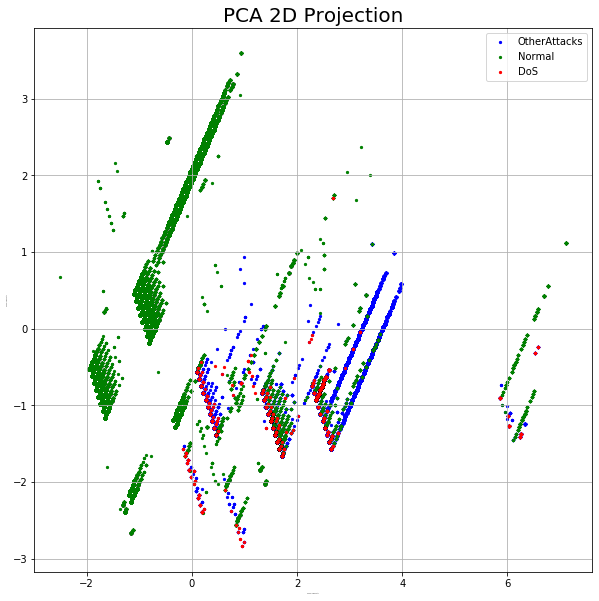

In [306]:
#Plot normal packets vs DoS packets vs OtherAttacks

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 0)
ax.set_ylabel('Principal Component 2', fontsize = 0)
ax.set_title('PCA 2D Projection', fontsize = 20)
targets = ['OtherAttacks','Normal','DoS']
colors = ['b','g','r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['attack_cat'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 5
              )
ax.legend(targets)
ax.grid()